

#1) Data Set Loaders




### 1.1 Iris dataset

### 1.2 Digits (MNIST Handwritten digits)

### 1.3 Wine

### 1.4 Breast cancer

### 1.5 Diabetes

### 1.6 Linnerud

### 1.7 Blobs

### 1.8 Circles

### 1.9 Moons

### 1.10 Olivetti faces (classification)

### 1.11 California housing (regression)





In [ ]:
from sklearn.datasets import (
    load_iris, load_digits, load_wine, load_breast_cancer, load_diabetes,
    load_linnerud, make_blobs, make_circles, make_moons, fetch_olivetti_faces,
    fetch_california_housing
)
from sklearn.model_selection import train_test_split

# Classification Datasets
datasets = {
    "Iris": load_iris(),
    "Digits": load_digits(),
    "Wine": load_wine(),
    "Breast Cancer": load_breast_cancer()
}

# Regression Datasets
datasets.update({
    "Diabetes": load_diabetes(),
    "Linnerud": load_linnerud()
})

# Synthetic Datasets
datasets.update({
    "Blobs": make_blobs(n_samples=300, centers=3, random_state=42),
    "Circles": make_circles(n_samples=300, noise=0.05, random_state=42),
    "Moons": make_moons(n_samples=300, noise=0.05, random_state=42)
})

# Real-world Larger Datasets
datasets.update({
    "Olivetti Faces": fetch_olivetti_faces(shuffle=True, random_state=42),
    "California Housing": fetch_california_housing()
})

# Apply train-test split
for name, data in datasets.items():
    if isinstance(data, tuple):  # Synthetic datasets return (X, y)
        X, y = data
    else:
        X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"{name} dataset: Train shape {X_train.shape}, Test shape {X_test.shape}")


Iris dataset: Train shape (120, 4), Test shape (30, 4)
Digits dataset: Train shape (1437, 64), Test shape (360, 64)
Wine dataset: Train shape (142, 13), Test shape (36, 13)
Breast Cancer dataset: Train shape (455, 30), Test shape (114, 30)
Diabetes dataset: Train shape (353, 10), Test shape (89, 10)
Linnerud dataset: Train shape (16, 3), Test shape (4, 3)
Blobs dataset: Train shape (240, 2), Test shape (60, 2)
Circles dataset: Train shape (240, 2), Test shape (60, 2)
Moons dataset: Train shape (240, 2), Test shape (60, 2)
Olivetti Faces dataset: Train shape (320, 4096), Test shape (80, 4096)
California Housing dataset: Train shape (16512, 8), Test shape (4128, 8)


#2)Classification

### 2.1 Logistic Regression

### 2.2 Decision Tree

### 2.3 Random Forest

### 2.4 AdaBoost

### 2.5 Gradient Boost

### 2.6 SVC

### 2.7 Voting

### 2.8 Stacking

### 2.9 Naive Bayes (Gaussian)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(n_estimators=10),
    "SVC": make_pipeline(StandardScaler(), SVC()),
    "Voting": VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier())
    ], voting='hard'),
    "Stacking": StackingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier())
    ], final_estimator=LogisticRegression(),
       cv=StratifiedKFold(n_splits=2)),
    "Naive Bayes (Gaussian)": GaussianNB()
}

model_instance = {}
test_datasets = {}

for name, data in datasets.items():
    if isinstance(data, tuple):  # Synthetic datasets return (X, y)
        X, y = data
    else:
        X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    test_datasets[name] = (X_test, y_test)
    if name in ["Linnerud","California Housing"]:
          print(f"Skipped Regression {name} dataset")
          print("------------------------------------------------")
          continue
    print(f"{name} dataset: Train shape {X_train.shape}, Test shape {X_test.shape}")
    model_instance[name] = {}
    print(f"Traning {name} dataset")
    for model_name, model in models.items():
        s_model = clone(model)
        s_model.fit(X_train, y_train)
        model_instance[name][model_name] = s_model
        print(f"{model_name} trained on {name} dataset")
    print(f"Finished training {name} dataset")
    print("------------------------------------------------")


Iris dataset: Train shape (120, 4), Test shape (30, 4)
Traning Iris dataset
Logistic Regression trained on Iris dataset
Decision Tree trained on Iris dataset
Random Forest trained on Iris dataset
AdaBoost trained on Iris dataset
Gradient Boost trained on Iris dataset
SVC trained on Iris dataset
Voting trained on Iris dataset
Stacking trained on Iris dataset
Naive Bayes (Gaussian) trained on Iris dataset
Finished training Iris dataset
------------------------------------------------
Digits dataset: Train shape (1437, 64), Test shape (360, 64)
Traning Digits dataset
Logistic Regression trained on Digits dataset
Decision Tree trained on Digits dataset
Random Forest trained on Digits dataset
AdaBoost trained on Digits dataset
Gradient Boost trained on Digits dataset
SVC trained on Digits dataset
Voting trained on Digits dataset
Stacking trained on Digits dataset
Naive Bayes (Gaussian) trained on Digits dataset
Finished training Digits dataset
-----------------------------------------------

#3) Classification - Metrics

### 3.1 Accuracy

### 3.2 Precision

### 3.3 Recall

### 3.4 F1-score

### 3.5 AUC score

### 3.6 Plot PR Curve

### 3.7 Plot ROC Curve




-------------------------- Evaluation on Iris dataset --------------------------
 Iris (30, 4) (30,)

----------- Evaluating Logistic Regression on Iris dataset -----------
  MAP: 1.0000
Logistic Regression: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating Decision Tree on Iris dataset -----------
  MAP: 1.0000
Decision Tree: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating Random Forest on Iris dataset -----------
  MAP: 1.0000
Random Forest: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating AdaBoost on Iris dataset -----------
  MAP: 0.9889
AdaBoost: Accuracy=0.9333, Precision=0.9333, Recall=0.9333, F1-score=0.9333

----------- Evaluating Gradient Boost on Iris dataset -----------
  MAP: 1.0000
Gradient Boost: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating SVC on Iris dataset -----------
SVC: Accuracy=1.0000, Precision=1

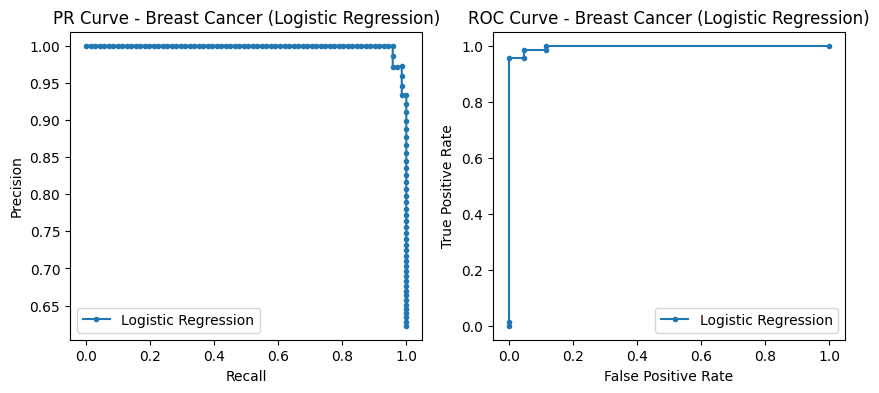


----------- Evaluating Decision Tree on Breast Cancer dataset -----------
  AUC: 0.9369
Decision Tree: Accuracy=0.9386, Precision=0.9390, Recall=0.9386, F1-score=0.9387


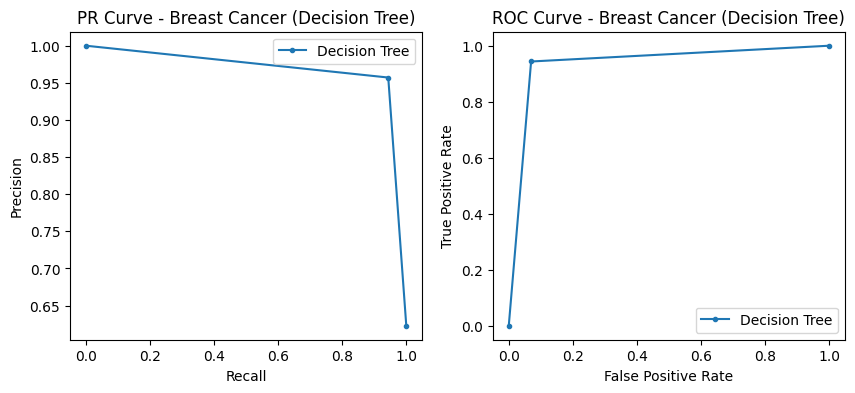


----------- Evaluating Random Forest on Breast Cancer dataset -----------
  AUC: 0.9967
Random Forest: Accuracy=0.9561, Precision=0.9561, Recall=0.9561, F1-score=0.9560


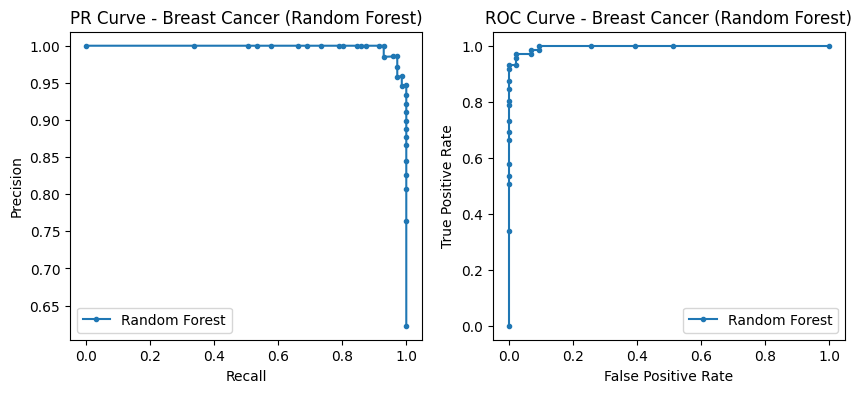


----------- Evaluating AdaBoost on Breast Cancer dataset -----------
  AUC: 0.9925
AdaBoost: Accuracy=0.9649, Precision=0.9652, Recall=0.9649, F1-score=0.9647


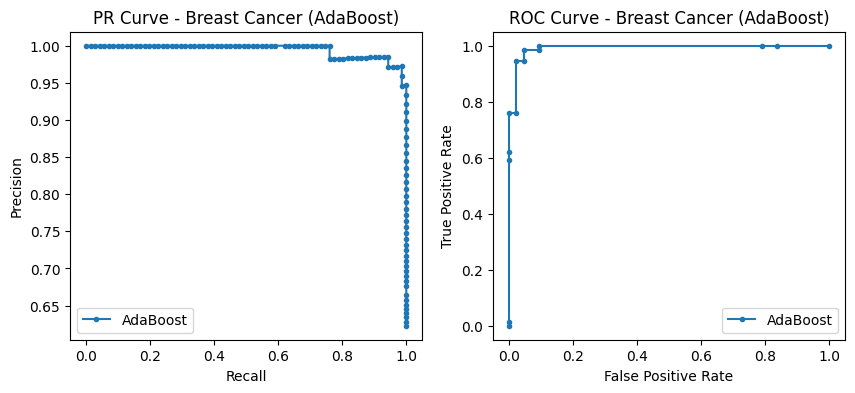


----------- Evaluating Gradient Boost on Breast Cancer dataset -----------
  AUC: 0.9668
Gradient Boost: Accuracy=0.9561, Precision=0.9561, Recall=0.9561, F1-score=0.9560


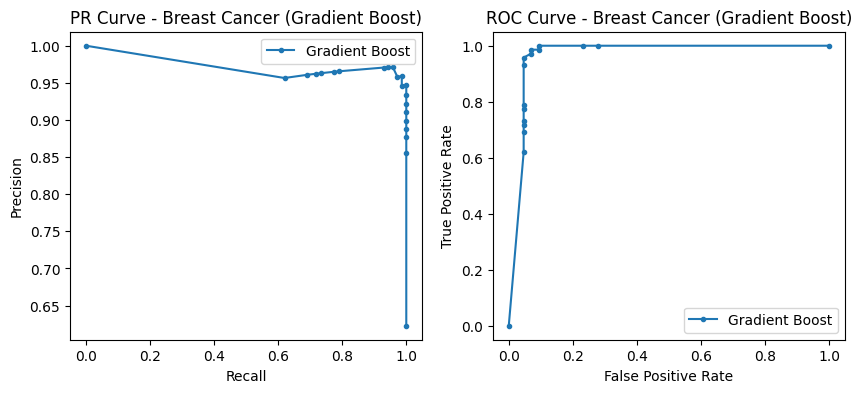


----------- Evaluating SVC on Breast Cancer dataset -----------
SVC: Accuracy=0.9825, Precision=0.9829, Recall=0.9825, F1-score=0.9824

----------- Evaluating Voting on Breast Cancer dataset -----------
Voting: Accuracy=0.9649, Precision=0.9652, Recall=0.9649, F1-score=0.9647

----------- Evaluating Stacking on Breast Cancer dataset -----------
  AUC: 0.9974
Stacking: Accuracy=0.9649, Precision=0.9652, Recall=0.9649, F1-score=0.9647


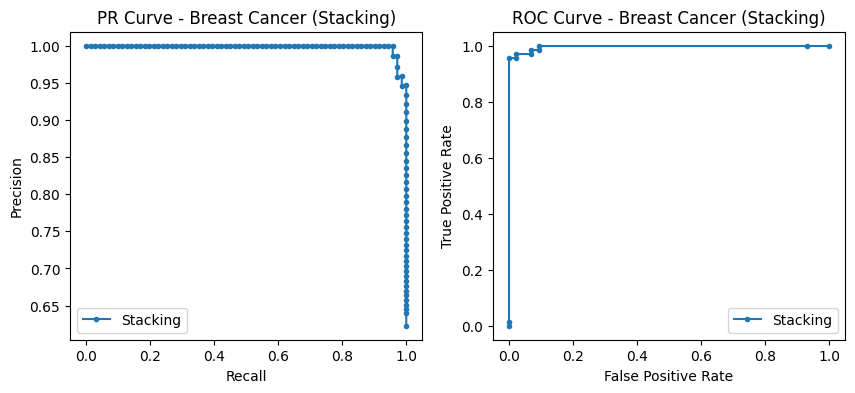


----------- Evaluating Naive Bayes (Gaussian) on Breast Cancer dataset -----------
  AUC: 0.9984
Naive Bayes (Gaussian): Accuracy=0.9737, Precision=0.9748, Recall=0.9737, F1-score=0.9735


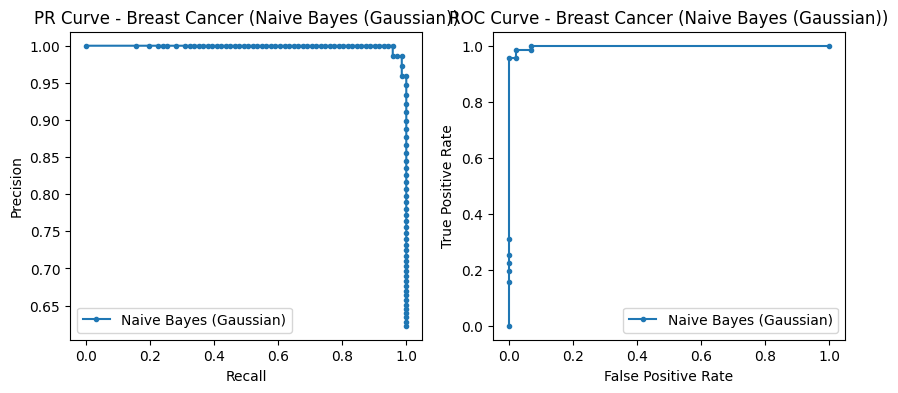


-------------------------- Evaluation on Blobs dataset --------------------------
 Blobs (60, 2) (60,)

----------- Evaluating Logistic Regression on Blobs dataset -----------
  MAP: 1.0000
Logistic Regression: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating Decision Tree on Blobs dataset -----------
  MAP: 1.0000
Decision Tree: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating Random Forest on Blobs dataset -----------
  MAP: 1.0000
Random Forest: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating AdaBoost on Blobs dataset -----------
  MAP: 1.0000
AdaBoost: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating Gradient Boost on Blobs dataset -----------
  MAP: 1.0000
Gradient Boost: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating SVC on Blobs dataset -----------
SVC: Accuracy=1.0000, Pre

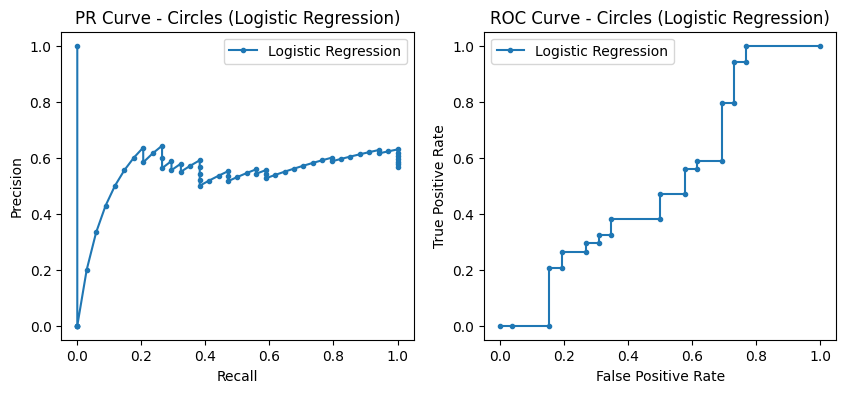


----------- Evaluating Decision Tree on Circles dataset -----------
  AUC: 0.8303
Decision Tree: Accuracy=0.8333, Precision=0.8333, Recall=0.8333, F1-score=0.8333


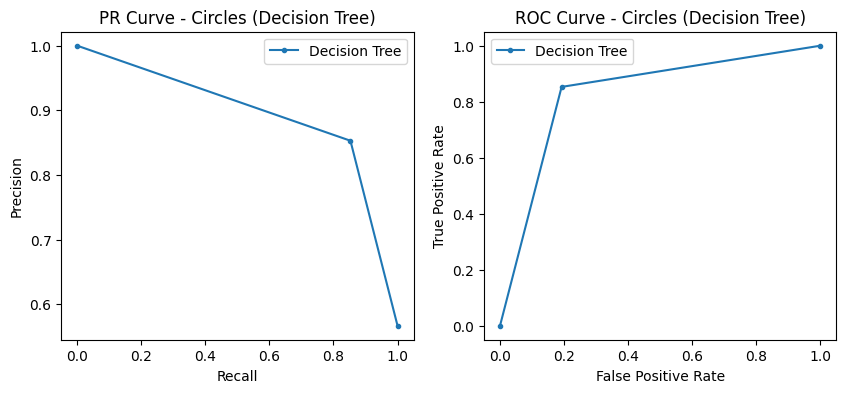


----------- Evaluating Random Forest on Circles dataset -----------
  AUC: 0.9242
Random Forest: Accuracy=0.8667, Precision=0.8695, Recall=0.8667, F1-score=0.8671


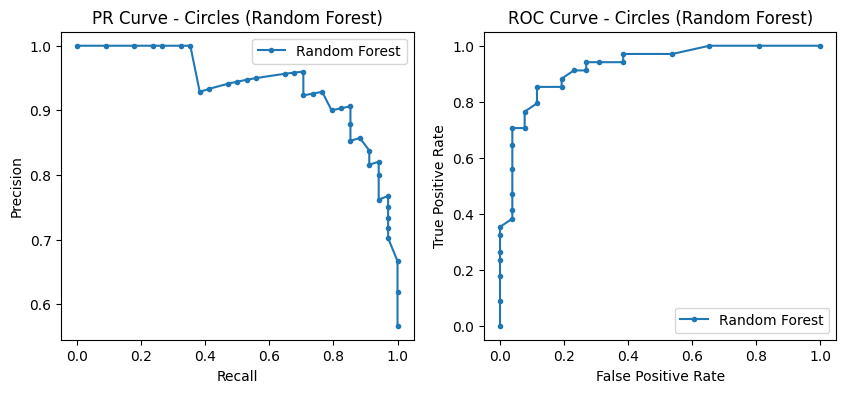


----------- Evaluating AdaBoost on Circles dataset -----------
  AUC: 0.8184
AdaBoost: Accuracy=0.7833, Precision=0.7846, Recall=0.7833, F1-score=0.7838


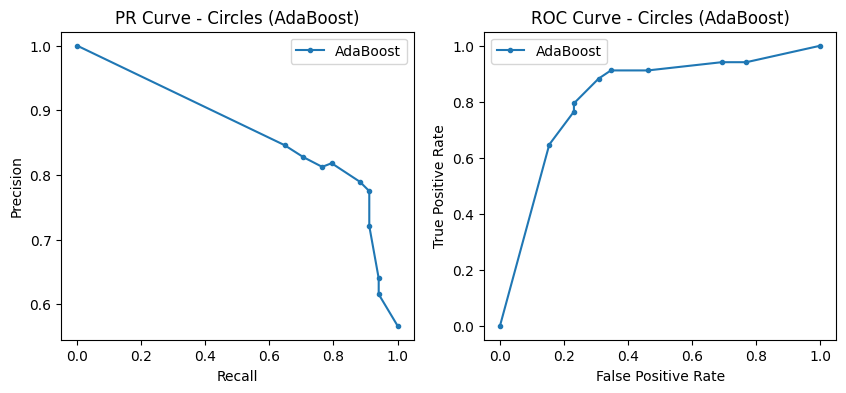


----------- Evaluating Gradient Boost on Circles dataset -----------
  AUC: 0.8105
Gradient Boost: Accuracy=0.7833, Precision=0.7846, Recall=0.7833, F1-score=0.7838


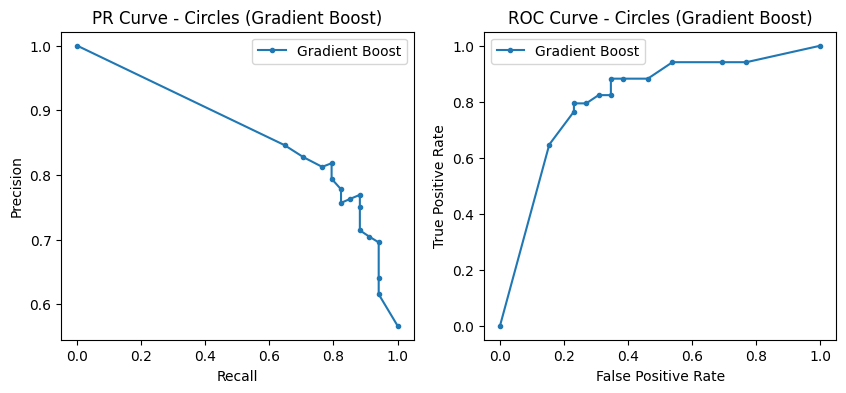


----------- Evaluating SVC on Circles dataset -----------
SVC: Accuracy=0.9833, Precision=0.9840, Recall=0.9833, F1-score=0.9834

----------- Evaluating Voting on Circles dataset -----------
Voting: Accuracy=0.8500, Precision=0.8631, Recall=0.8500, F1-score=0.8506

----------- Evaluating Stacking on Circles dataset -----------
  AUC: 0.9140
Stacking: Accuracy=0.8333, Precision=0.8422, Recall=0.8333, F1-score=0.8341


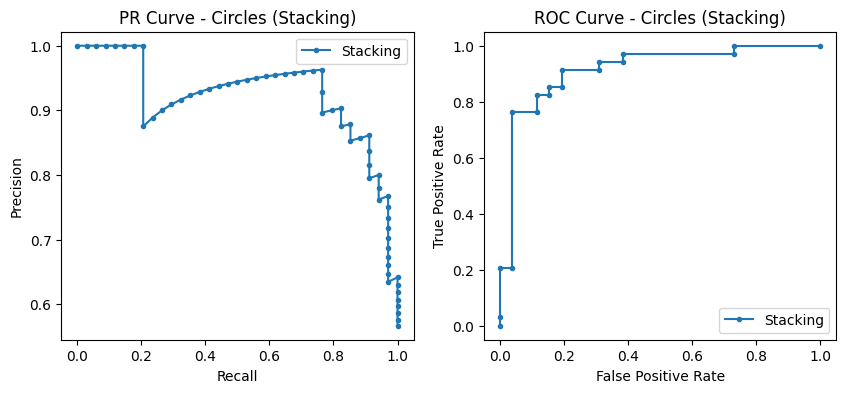


----------- Evaluating Naive Bayes (Gaussian) on Circles dataset -----------
  AUC: 0.9140
Naive Bayes (Gaussian): Accuracy=0.6333, Precision=0.8014, Recall=0.6333, F1-score=0.6002


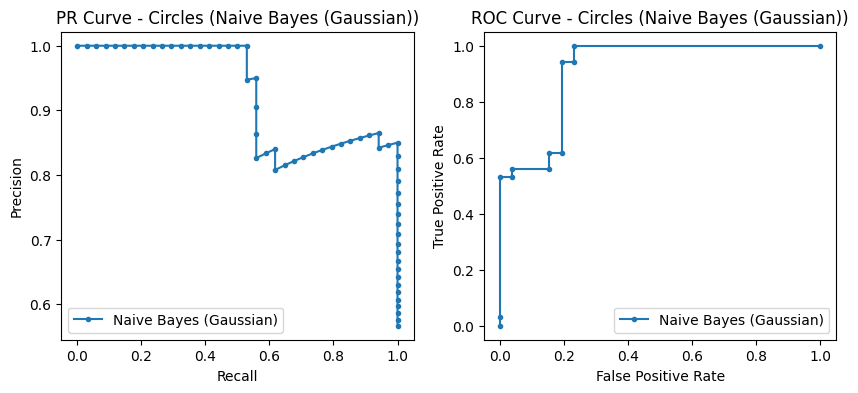


-------------------------- Evaluation on Moons dataset --------------------------
 Moons (60, 2) (60,)

----------- Evaluating Logistic Regression on Moons dataset -----------
  AUC: 0.9853
Logistic Regression: Accuracy=0.9667, Precision=0.9667, Recall=0.9667, F1-score=0.9667


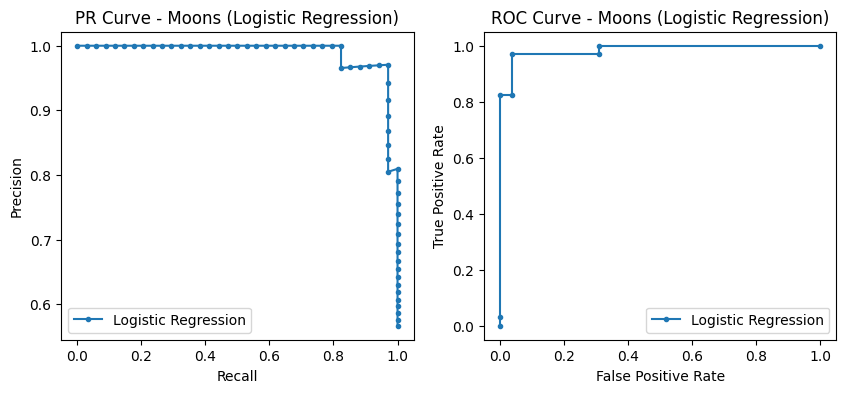


----------- Evaluating Decision Tree on Moons dataset -----------
  AUC: 0.9468
Decision Tree: Accuracy=0.9500, Precision=0.9503, Recall=0.9500, F1-score=0.9499


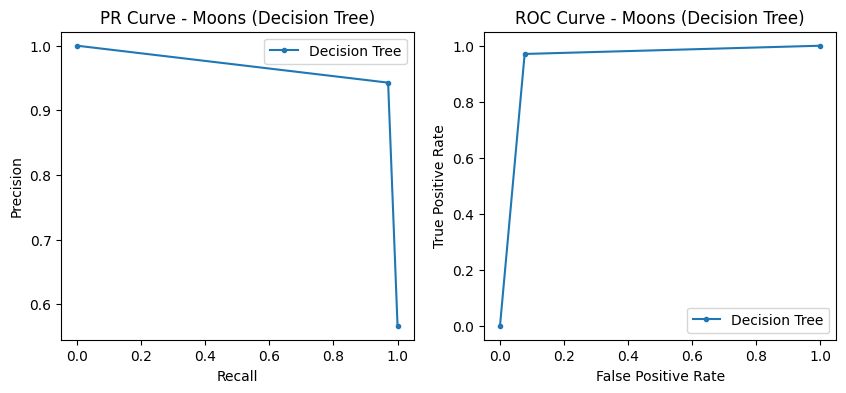


----------- Evaluating Random Forest on Moons dataset -----------
  AUC: 1.0000
Random Forest: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000


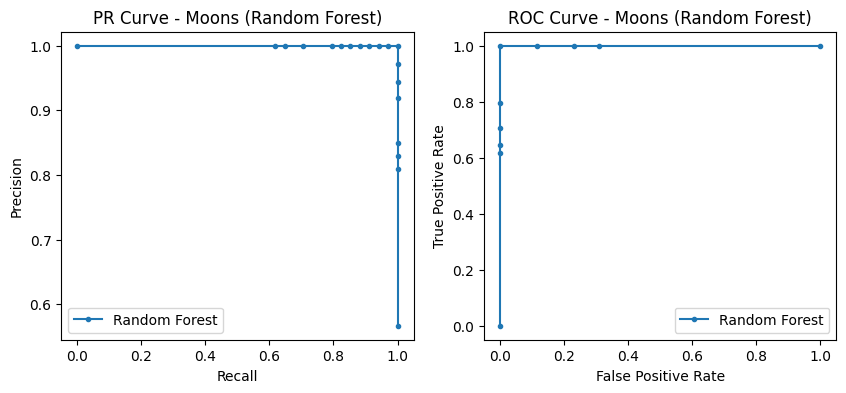


----------- Evaluating AdaBoost on Moons dataset -----------
  AUC: 1.0000
AdaBoost: Accuracy=0.9833, Precision=0.9838, Recall=0.9833, F1-score=0.9833


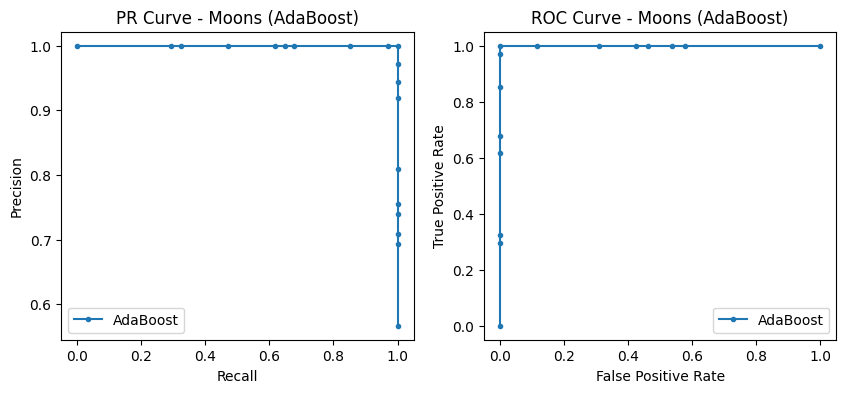


----------- Evaluating Gradient Boost on Moons dataset -----------
  AUC: 0.9943
Gradient Boost: Accuracy=0.9333, Precision=0.9333, Recall=0.9333, F1-score=0.9333


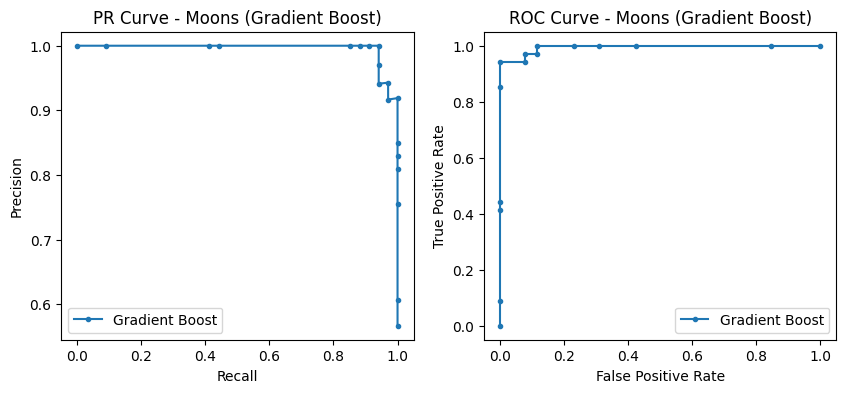


----------- Evaluating SVC on Moons dataset -----------
SVC: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating Voting on Moons dataset -----------
Voting: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000

----------- Evaluating Stacking on Moons dataset -----------
  AUC: 0.9989
Stacking: Accuracy=0.9667, Precision=0.9685, Recall=0.9667, F1-score=0.9665


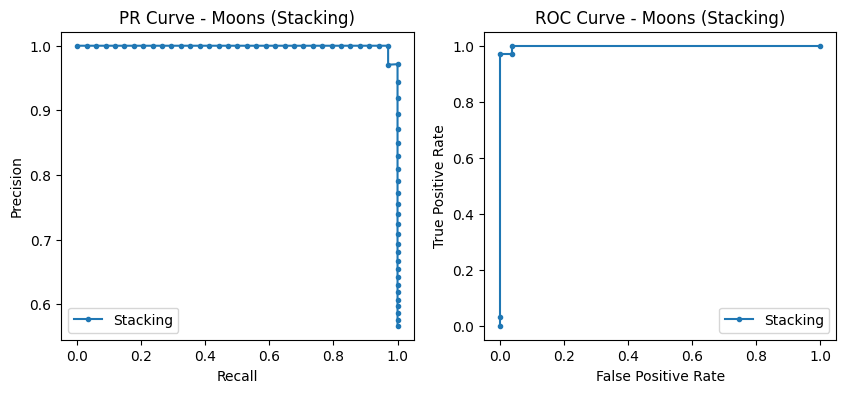


----------- Evaluating Naive Bayes (Gaussian) on Moons dataset -----------
  AUC: 0.9853
Naive Bayes (Gaussian): Accuracy=0.9667, Precision=0.9667, Recall=0.9667, F1-score=0.9667


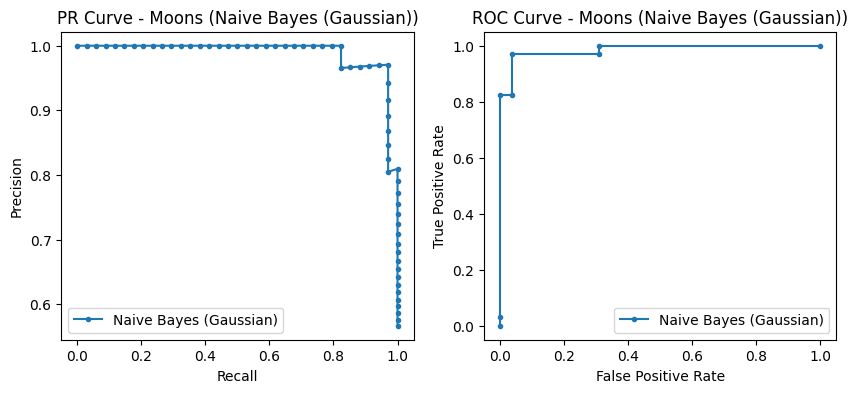


-------------------------- Evaluation on Olivetti Faces dataset --------------------------
 Olivetti Faces (80, 4096) (80,)

----------- Evaluating Logistic Regression on Olivetti Faces dataset -----------
  MAP: 0.9938
Logistic Regression: Accuracy=0.9125, Precision=0.9000, Recall=0.9125, F1-score=0.8948

----------- Evaluating Decision Tree on Olivetti Faces dataset -----------
  MAP: 0.3336
Decision Tree: Accuracy=0.4750, Precision=0.5329, Recall=0.4750, F1-score=0.4606

----------- Evaluating Random Forest on Olivetti Faces dataset -----------
  MAP: 0.9837
Random Forest: Accuracy=0.9250, Precision=0.9667, Recall=0.9250, F1-score=0.9295

----------- Evaluating AdaBoost on Olivetti Faces dataset -----------
  MAP: 0.3171
AdaBoost: Accuracy=0.0625, Precision=0.0502, Recall=0.0625, F1-score=0.0503

----------- Evaluating Gradient Boost on Olivetti Faces dataset -----------
  MAP: 0.5339
Gradient Boost: Accuracy=0.4000, Precision=0.5530, Recall=0.4000, F1-score=0.4231

----------- Eva

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve,average_precision_score
import numpy as np
from sklearn.preprocessing import label_binarize


for name, (X_test, y_test) in test_datasets.items():
    if name not in model_instance or name=="Diabetes":
        continue
    if name in ["Linnerud", "California Housing"]:
        print(f"\nSkipping evaluation for regression dataset: {name}")
        continue

    print(f"\n-------------------------- Evaluation on {name} dataset --------------------------")
    print(f" {name} {X_test.shape} {y_test.shape}")
    for model_name, model in model_instance[name].items():
        print(f"\n----------- Evaluating {model_name} on {name} dataset -----------")
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test) if (hasattr(model, "predict_proba") or hasattr(model,"")) else None

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted')
        if y_prob is not None:

            if len(set(y_test)) > 2:  # Multi-class case
                if name=="Olivetti Faces":
                  y_test_bin = label_binarize(y_test, classes=list(range(y_prob.shape[1])))
                else:
                  y_test_bin = y_test
                map_score = average_precision_score(y_test_bin, y_prob, average='weighted')
                print(f"  MAP: {map_score:.4f}")
                y_prob = None
            else:
                auc = roc_auc_score(y_test, y_prob[:, 1])
                print(f"  AUC: {auc:.4f}")
        else:
            auc = None

        print(f"{model_name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}")

        if y_prob is not None:
            precision_vals, recall_vals,_ = precision_recall_curve(y_test, y_prob[:, 1])
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.plot(recall_vals, precision_vals, marker='.', label=model_name)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'PR Curve - {name} ({model_name})')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(fpr, tpr, marker='.', label=model_name)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name} ({model_name})')
            plt.legend()

            plt.show()

#4) Regression

###4.1 Linear Regression
###4.2 Decision Tree Regression
###4.3 Random Forest Regression
###4.4 AdaBoost Regression
###4.5 Gradient Boost Regression
###4.6 SVR
###4.7 Voting Regression
###4.8 Stacking Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import KFold



regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "AdaBoost Regression": AdaBoostRegressor(),
    "Gradient Boost Regression": GradientBoostingRegressor(),
    "SVR": make_pipeline(StandardScaler(), SVR()),
    "Voting Regression": VotingRegressor([
        ("lr", LinearRegression()),
        ("dt", DecisionTreeRegressor()),
        ("rf", RandomForestRegressor())
    ]),
    "Stacking Regression": StackingRegressor([
        ("lr", LinearRegression()),
        ("dt", DecisionTreeRegressor()),
        ("rf", RandomForestRegressor())
    ], final_estimator=LinearRegression(), cv=KFold(n_splits=2))
}

model_instance = {}

for name, (X_train, y_train) in test_datasets.items():
    if name not in ["Diabetes", "Linnerud", "California Housing"]:
        continue
    model_instance[name] = {}
    print(f"\nTraining regression models on {name} dataset")
    for model_name, model in regression_models.items():
        s_model = clone(model)
        if name == "Linnerud":
            s_model = MultiOutputRegressor(s_model)
        s_model.fit(X_train, y_train)
        model_instance[name][model_name] = s_model
        print(f"{model_name} trained on {name} dataset")



Training regression models on Diabetes dataset
Linear Regression trained on Diabetes dataset
Decision Tree Regression trained on Diabetes dataset
Random Forest Regression trained on Diabetes dataset
AdaBoost Regression trained on Diabetes dataset
Gradient Boost Regression trained on Diabetes dataset
SVR trained on Diabetes dataset
Voting Regression trained on Diabetes dataset
Stacking Regression trained on Diabetes dataset

Training regression models on Linnerud dataset
Linear Regression trained on Linnerud dataset
Decision Tree Regression trained on Linnerud dataset
Random Forest Regression trained on Linnerud dataset
AdaBoost Regression trained on Linnerud dataset
Gradient Boost Regression trained on Linnerud dataset
SVR trained on Linnerud dataset
Voting Regression trained on Linnerud dataset
Stacking Regression trained on Linnerud dataset

Training regression models on California Housing dataset
Linear Regression trained on California Housing dataset
Decision Tree Regression train

#5) Regression - Metrics


### 5.1,5.2 RMS,R2-Score

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate regression models on test datasets
for name, (X_test, y_test) in test_datasets.items():
    if name not in model_instance:  # Ensure model exists for this dataset
        continue

    print(f"\n-------------------------- Evaluation on {name} dataset --------------------------")
    print(f" {name} {X_test.shape} {y_test.shape}")

    for model_name, model in model_instance[name].items():
        print(f"\n----------- Evaluating {model_name} on {name} dataset -----------")

        y_pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        print(f"{model_name}: RMSE={rmse:.4f}, R2-score={r2:.4f}")


-------------------------- Evaluation on Diabetes dataset --------------------------
 Diabetes (89, 10) (89,)

----------- Evaluating Linear Regression on Diabetes dataset -----------
Linear Regression: RMSE=50.6578, R2-score=0.5156

----------- Evaluating Decision Tree Regression on Diabetes dataset -----------
Decision Tree Regression: RMSE=0.0000, R2-score=1.0000

----------- Evaluating Random Forest Regression on Diabetes dataset -----------
Random Forest Regression: RMSE=22.1242, R2-score=0.9076

----------- Evaluating AdaBoost Regression on Diabetes dataset -----------
AdaBoost Regression: RMSE=29.6684, R2-score=0.8339

----------- Evaluating Gradient Boost Regression on Diabetes dataset -----------
Gradient Boost Regression: RMSE=7.6252, R2-score=0.9890

----------- Evaluating SVR on Diabetes dataset -----------
SVR: RMSE=70.4144, R2-score=0.0642

----------- Evaluating Voting Regression on Diabetes dataset -----------
Voting Regression: RMSE=23.8154, R2-score=0.8929

---------

#6) Class Imbalance Scenario

###6.1 Create a synthetic data set for binary classification with class imbalance
###6.2 Use class-weight parameter of Decision Tree classifier
###6.3  Compute Metrics without using class-weight = balanced
###6.4 Compute Metrics with using class-weight = balanced


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#cTrain Decision Tree without class-weight balancing
dtc_no_weight = DecisionTreeClassifier(random_state=42)
dtc_no_weight.fit(X_train, y_train)

# Train Decision Tree with class-weight balancing
dtc_balanced = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dtc_balanced.fit(X_train, y_train)

# Predictions
y_pred_no_weight = dtc_no_weight.predict(X_test)
y_pred_balanced = dtc_balanced.predict(X_test)

# Compute metrics
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n---- {model_name} ----")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

evaluate_model(y_test, y_pred_no_weight, "Decision Tree (No Class Weight)")
evaluate_model(y_test, y_pred_balanced, "Decision Tree (Class Weight = Balanced)")




---- Decision Tree (No Class Weight) ----
Accuracy: 0.9650
Precision: 0.9333
Recall: 0.7000
F1-score: 0.8000

---- Decision Tree (Class Weight = Balanced) ----
Accuracy: 0.9350
Precision: 0.6667
Recall: 0.7000
F1-score: 0.6829


### 6.5 Observations:
Accuracy Drop

- The "Balanced" model has slightly lower accuracy (93.5% vs. 96.5%) because it now penalizes misclassifying the minority class.
  The "No Weight" model gets high accuracy by mostly predicting the majority class.

Precision Drop in Balanced Model

-  Precision dropped significantly (from 0.9333 → 0.6667) because the balanced model is now predicting the minority class more often, increasing false positives.

Recall Remains the Same

-  Both models have a recall of 0.7000, meaning they correctly identified 70% of the minority class instances.

F1-Score Drop in Balanced Model

-  The F1-score for balanced class weights is lower (0.6829 vs. 0.8000) because precision dropped significantly.

#7) Missing Value Imputation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

### 7.1 Introduce Missing Values

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target
X = pd.DataFrame(X, columns=data.feature_names)
np.random.seed(42)
missing_mask = np.random.rand(*X.shape) < 0.1
X_missing = X.copy()
X_missing[missing_mask] = np.nan

### 7.2,7.3,7.4,7.5 Imputation by Constant,Mean,MOde,Machine Learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_missing, y, test_size=0.2, random_state=42)

# Define different imputation methods
imputation_strategies = {
    "Constant (-1)": SimpleImputer(strategy="constant", fill_value=-1),
    "Mean": SimpleImputer(strategy="mean"),
    "Mode": SimpleImputer(strategy="most_frequent"),
    "ML (KNNImputer)": KNNImputer(n_neighbors=5)
}

results = {}

for strategy, imputer in imputation_strategies.items():
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Train RandomForest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_imputed, y_train)

    # Predict
    y_pred = model.predict(X_test_imputed)

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[strategy] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# Print Results
df_results = pd.DataFrame(results).T
print(df_results)

                 Accuracy  Precision    Recall  F1-score
Constant (-1)    0.956140   0.958333  0.971831  0.965035
Mean             0.956140   0.958333  0.971831  0.965035
Mode             0.964912   0.958904  0.985915  0.972222
ML (KNNImputer)  0.956140   0.958333  0.971831  0.965035


#8) Manifold learning - PCA, tSNE, MDS


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

### 8.1 PCA

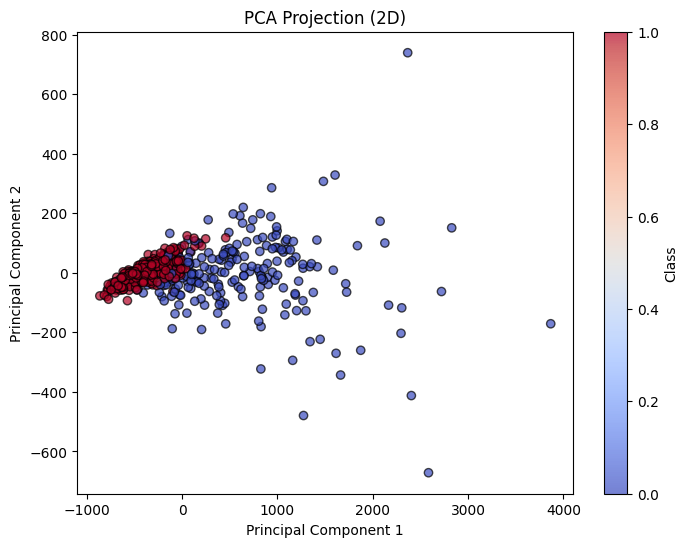

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target
X = pd.DataFrame(X, columns=data.feature_names)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.7, edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (2D)")
plt.colorbar(label="Class")
plt.show()

### 8.2 tSNE

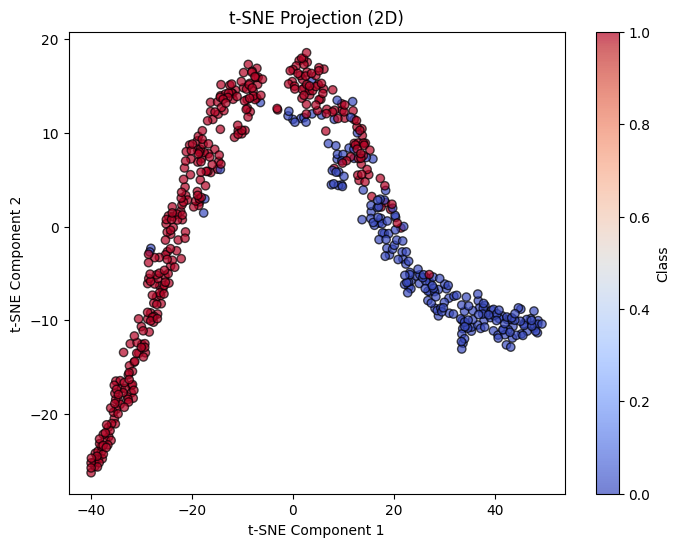

In [ ]:
# Apply t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="coolwarm", alpha=0.7, edgecolors="k")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection (2D)")
plt.colorbar(label="Class")
plt.show()

### 8.3 MDS

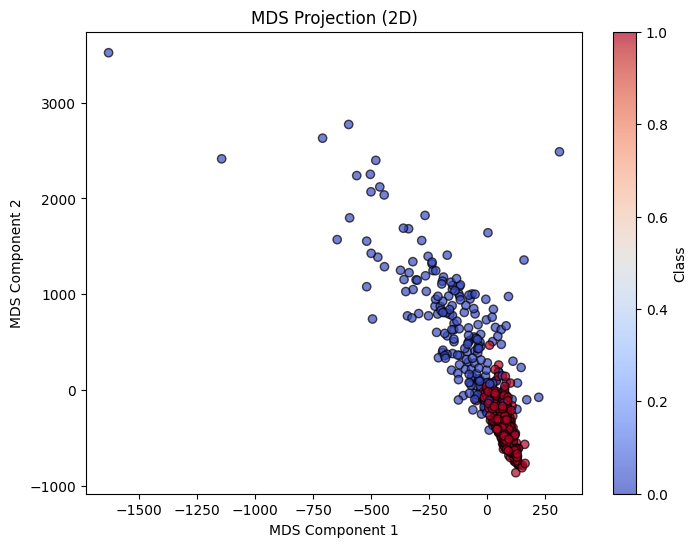

In [ ]:
# Apply MDS with 2 components
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# Plot MDS result
plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap="coolwarm", alpha=0.7, edgecolors="k")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("MDS Projection (2D)")
plt.colorbar(label="Class")
plt.show()


#9) Clustering - KMeans, Hierarchical, DBSCAN


### 9.1 Concentric Circles


### 9.2 Blobs


### 9.3 Moons

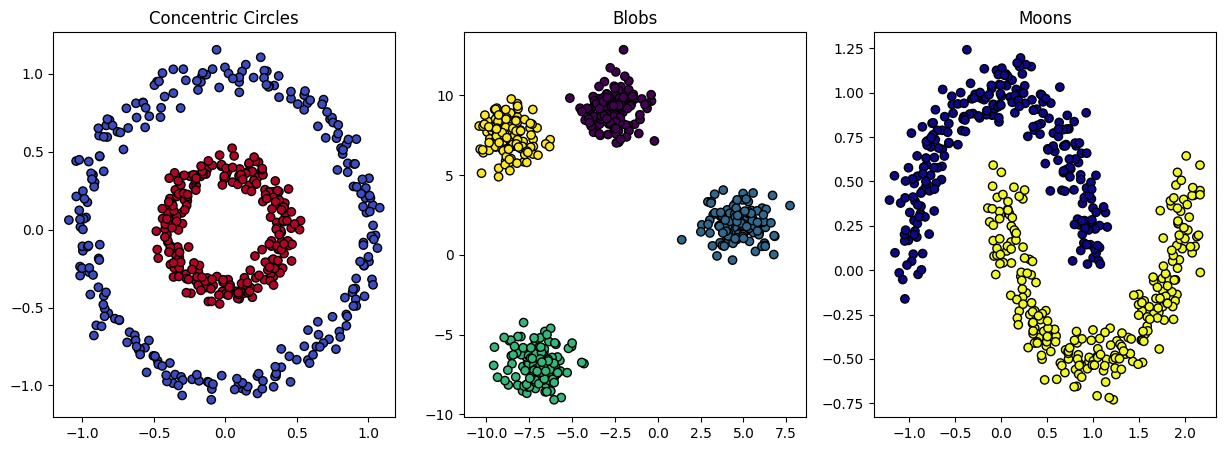

In [ ]:
X_circles, y_circles = make_circles(n_samples=500, factor=0.4, noise=0.05, random_state=42)
X_blobs, y_blobs = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)
X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=42)

# Plot the datasets with labels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap="coolwarm", edgecolors="k")
axes[0].set_title("Concentric Circles")

axes[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap="viridis", edgecolors="k")
axes[1].set_title("Blobs")

axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap="plasma", edgecolors="k")
axes[2].set_title("Moons")

plt.show()

### 9.4 KMeans

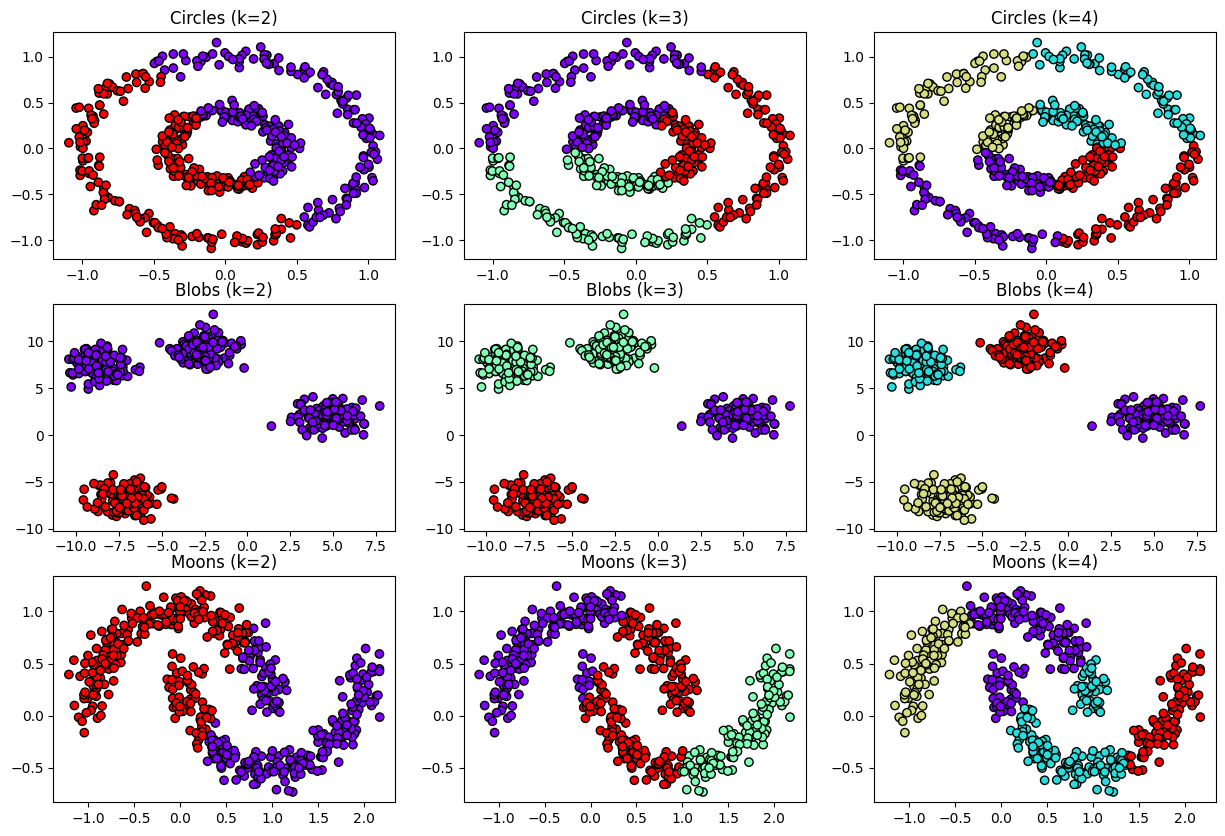

In [ ]:
from sklearn.cluster import KMeans

datasets = {"Circles": X_circles, "Blobs": X_blobs, "Moons": X_moons}
k_values = [2, 3, 4]

fig, axes = plt.subplots(len(datasets), len(k_values), figsize=(15, 10))

for i, (name, X) in enumerate(datasets.items()):
    for j, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        y_pred = kmeans.fit_predict(X)

        axes[i, j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap="rainbow", edgecolors="k")
        axes[i, j].set_title(f"{name} (k={k})")

plt.show()

### 9.5 Aggolomeratie Clustering

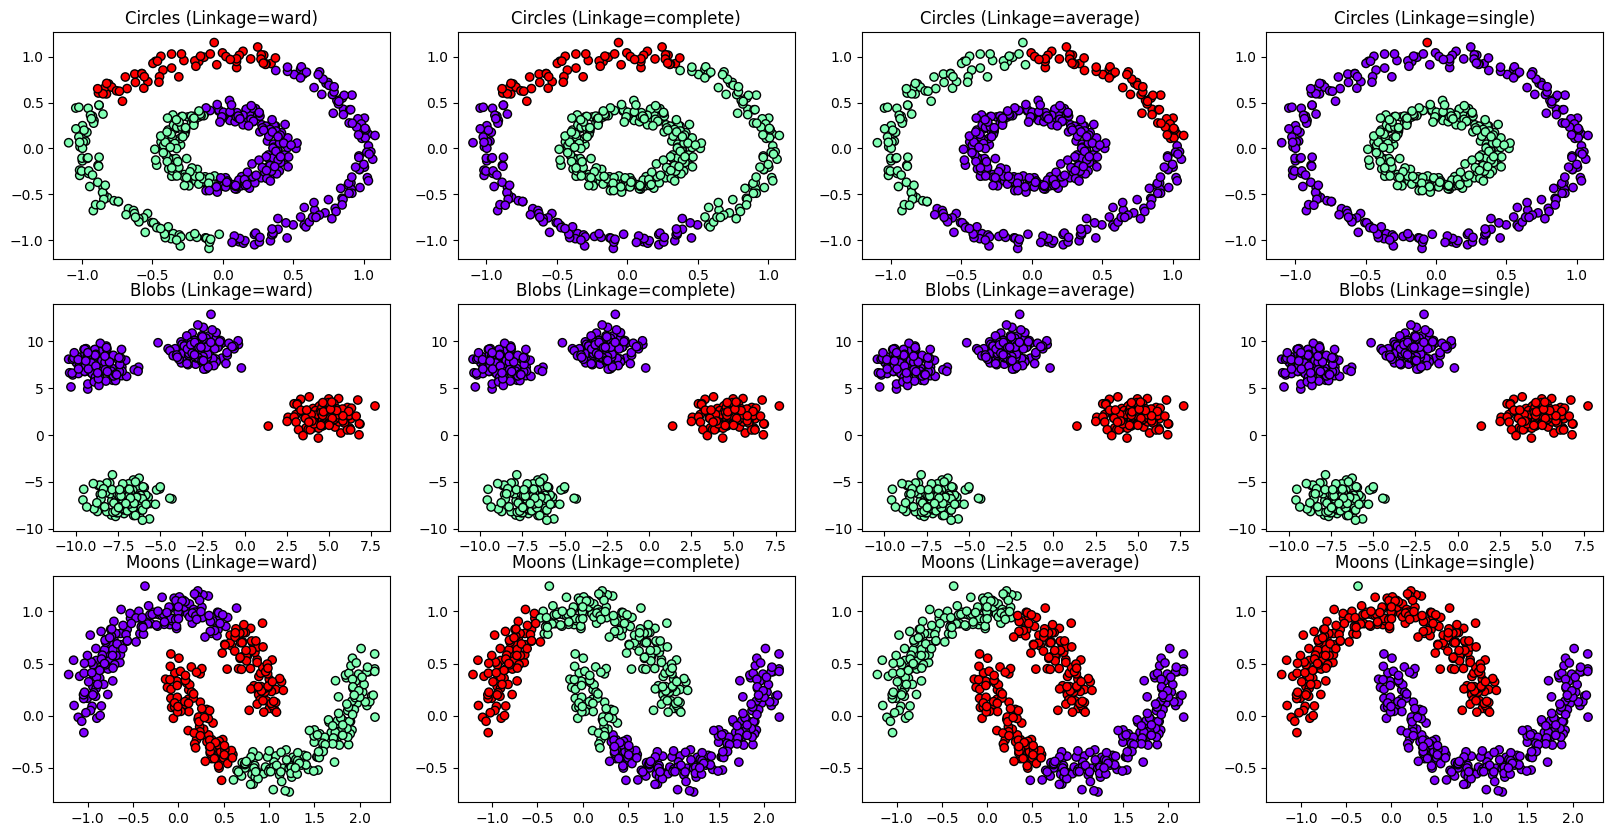

In [ ]:
from sklearn.cluster import AgglomerativeClustering

linkages = ["ward", "complete", "average", "single"]
fig, axes = plt.subplots(len(datasets), len(linkages), figsize=(20, 10))

for i, (name, X) in enumerate(datasets.items()):
    for j, linkage in enumerate(linkages):
        agglomerative = AgglomerativeClustering(n_clusters=3, linkage=linkage)
        y_pred = agglomerative.fit_predict(X)

        axes[i, j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap="rainbow", edgecolors="k")
        axes[i, j].set_title(f"{name} (Linkage={linkage})")

plt.show()

### 9.6 DBSCAN

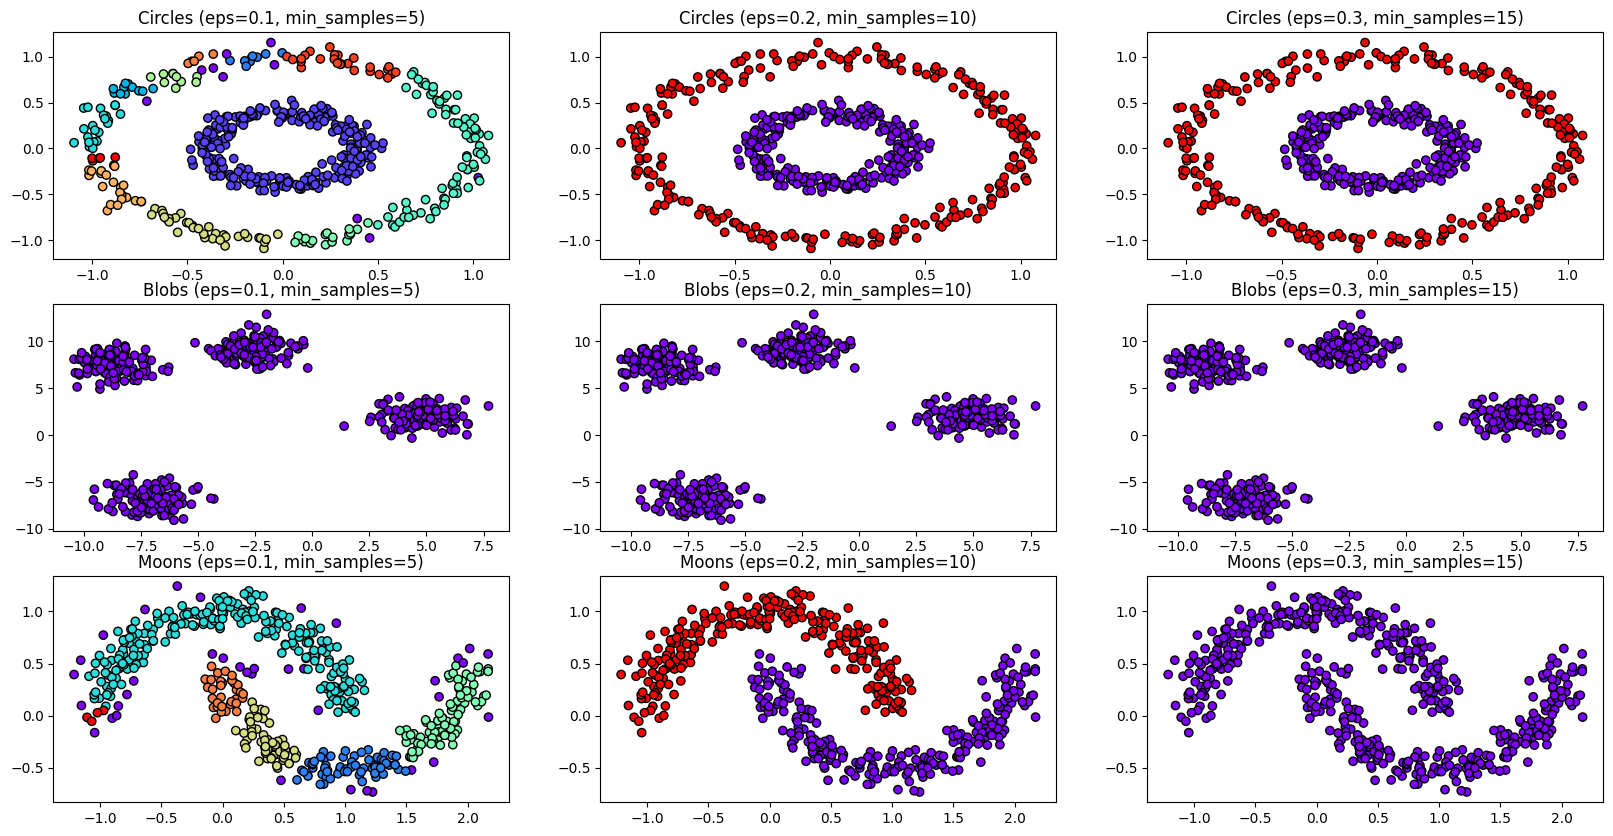

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_params = [(0.1, 5), (0.2, 10), (0.3, 15)]  # Different (eps, min_samples)
fig, axes = plt.subplots(len(datasets), len(dbscan_params), figsize=(20, 10))

for i, (name, X) in enumerate(datasets.items()):
    for j, (eps, min_samples) in enumerate(dbscan_params):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = dbscan.fit_predict(X)

        axes[i, j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap="rainbow", edgecolors="k")
        axes[i, j].set_title(f"{name} (eps={eps}, min_samples={min_samples})")

plt.show()

#10) Clustering - Metrics


In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score


# Generate synthetic concentric circles dataset
X_circles, y_true = make_circles(n_samples=500, factor=0.4, noise=0.05, random_state=42)

# Apply Clustering
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_circles)
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X_circles)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X_circles)

# Get predicted labels
y_kmeans = kmeans.labels_
y_hierarchical = hierarchical.labels_
y_dbscan = dbscan.labels_

###10.1 Homogeneity score


In [ ]:
print("Homogeneity Score:")
print(f"KMeans: {homogeneity_score(y_true, y_kmeans):.4f}")
print(f"Hierarchical: {homogeneity_score(y_true, y_hierarchical):.4f}")
print(f"DBSCAN: {homogeneity_score(y_true, y_dbscan):.4f}")


Homogeneity Score:
KMeans: 0.0000
Hierarchical: 0.0159
DBSCAN: 1.0000


###10.2 Completeness score

In [ ]:
print("Completeness Score:")
print(f"KMeans: {completeness_score(y_true, y_kmeans):.4f}")
print(f"Hierarchical: {completeness_score(y_true, y_hierarchical):.4f}")
print(f"DBSCAN: {completeness_score(y_true, y_dbscan):.4f}")


Completeness Score:
KMeans: 0.0000
Hierarchical: 0.0159
DBSCAN: 1.0000


###10.3 V-score


In [ ]:
print("V-Measure Score:")
print(f"KMeans: {v_measure_score(y_true, y_kmeans):.4f}")
print(f"Hierarchical: {v_measure_score(y_true, y_hierarchical):.4f}")
print(f"DBSCAN: {v_measure_score(y_true, y_dbscan):.4f}")


V-Measure Score:
KMeans: 0.0000
Hierarchical: 0.0159
DBSCAN: 1.0000


### 10.3 ARI

In [ ]:
print("Adjusted Rand Index (ARI):")
print(f"KMeans: {adjusted_rand_score(y_true, y_kmeans):.4f}")
print(f"Hierarchical: {adjusted_rand_score(y_true, y_hierarchical):.4f}")
print(f"DBSCAN: {adjusted_rand_score(y_true, y_dbscan):.4f}")


Adjusted Rand Index (ARI):
KMeans: -0.0020
Hierarchical: 0.0199
DBSCAN: 1.0000


#11) Pipeline & Transform function

### 11.1 PCA Transform

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Load Dataset
X, y = load_iris(return_X_y=True)

# Define Pipeline with PCA Transform
pca_pipeline = Pipeline([
    ("scaler", StandardScaler()),   # Normalize Data
    ("pca", PCA(n_components=2)),   # Apply PCA
    ("classifier", RandomForestClassifier(random_state=42))  # Classifier
])

# Fit the Pipeline
pca_pipeline.fit(X, y)

# Transform Data
X_pca = pca_pipeline.named_steps["pca"].transform(X)
print(f"PCA Transformed Data Shape: {X_pca.shape}")


PCA Transformed Data Shape: (150, 2)


### 11.2 Decision Tree Transform

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Custom Transformer using Decision Tree
class DecisionTreeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, max_depth=3):
        self.tree = DecisionTreeClassifier(max_depth=max_depth)

    def fit(self, X, y=None):
        self.tree.fit(X, y)
        return self

    def transform(self, X):
        return self.tree.apply(X).reshape(-1, 1)  # Convert tree leaves to features

# Define Pipeline with Decision Tree Transform
dt_pipeline = Pipeline([
    ("tree_transform", DecisionTreeTransformer(max_depth=3)),  # Apply Decision Tree
    ("classifier", RandomForestClassifier(random_state=42))  # Classifier
])

# Fit the Pipeline
dt_pipeline.fit(X, y)

# Transform Data
X_tree = dt_pipeline.named_steps["tree_transform"].transform(X)
print(f"Decision Tree Transformed Data Shape: {X_tree.shape}")

Decision Tree Transformed Data Shape: (150, 1)


#12) Grid Search & Cross Validation


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Load Dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Model
dt = DecisionTreeClassifier()

# Define Parameter Grid
param_grid = {
    "max_depth": [3, 5, 10, None],  # Depth of tree
    "criterion": ["gini", "entropy"]  # Splitting criteria
}

# Perform Grid Search
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy")
grid_search_dt.fit(X_train, y_train)

# Print Best Parameters and Accuracy
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Accuracy:", grid_search_dt.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10}
Best Accuracy: 0.9416666666666668


In [ ]:
# Define Model
rf = RandomForestClassifier(random_state=42)

# Define Parameter Grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [3, 5, 10, None]  # Depth of trees
}

# Perform Grid Search
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy")
grid_search_rf.fit(X_train, y_train)

# Print Best Parameters and Accuracy
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)


Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Best Accuracy: 0.95


In [ ]:
# Define Model
svc = SVC()

# Define Parameter Grid
param_grid = {
    "C": [0.1, 1, 10],  # Regularization parameter
    "kernel": ["linear", "rbf", "poly"]  # Type of kernel
}

# Perform Grid Search
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring="accuracy")
grid_search_svc.fit(X_train, y_train)

# Print Best Parameters and Accuracy
print("Best Parameters:", grid_search_svc.best_params_)
print("Best Accuracy:", grid_search_svc.best_score_)


Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Accuracy: 0.9583333333333334
